In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import cv2

ORIGINAL IMAGE


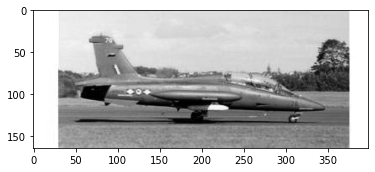

Sigma: 1.4142135623730951
Sigma: 2.8284271247461907
Sigma: 8.000000000000004
Sigma: 32.00000000000002
Sigma: 181.01933598375635
Size of Octave: (5, 164, 398)
Sigma: 1.4142135623730951
Sigma: 2.8284271247461907
Sigma: 8.000000000000004
Sigma: 32.00000000000002
Sigma: 181.01933598375635
Size of Octave: (5, 41, 99)
Sigma: 1.4142135623730951
Sigma: 2.8284271247461907
Sigma: 8.000000000000004
Sigma: 32.00000000000002
Sigma: 181.01933598375635
Size of Octave: (5, 10, 25)
Sigma: 1.4142135623730951
Sigma: 2.8284271247461907
Sigma: 8.000000000000004
Sigma: 32.00000000000002
Sigma: 181.01933598375635
Size of Octave: (5, 2, 6)


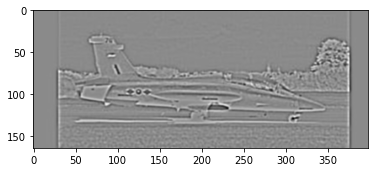

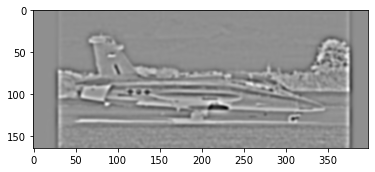

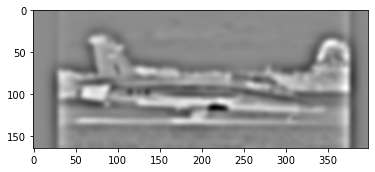

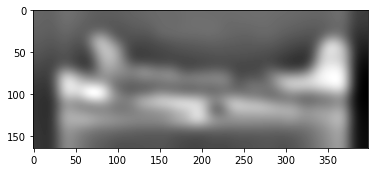

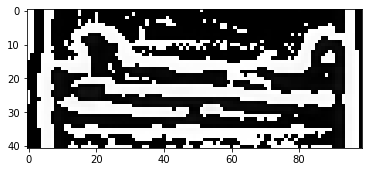

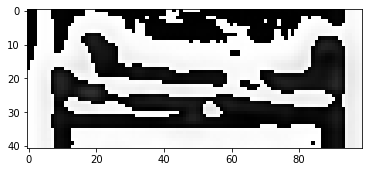

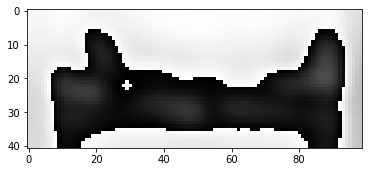

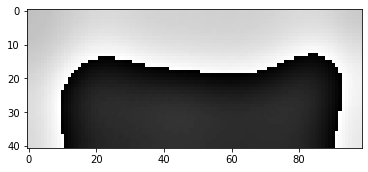

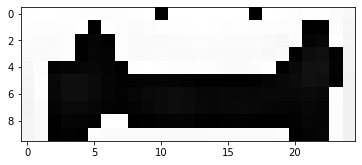

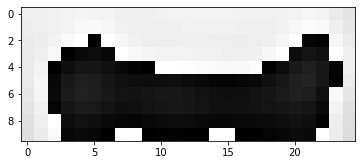

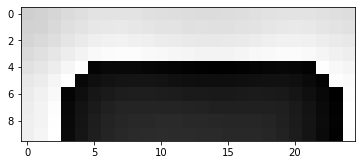

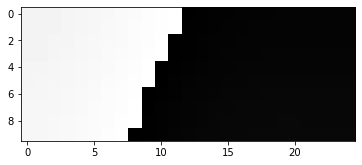

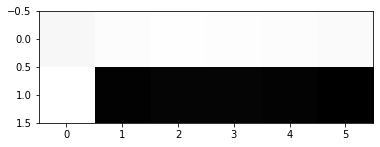

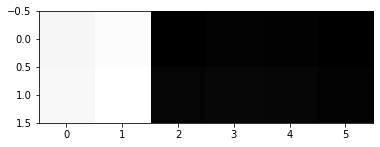

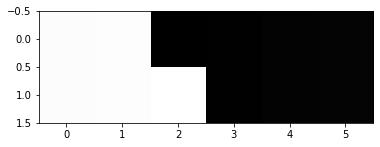

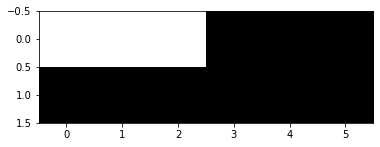

In [47]:
#print("Filtered with Sigma = 1")
#y = gaussian_filter(img, sigma = 1)
#plt.imshow(y)
#plt.show()

#y = gaussian_filter(img, sigma = 2)
#plt.imshow(y)
#plt.show()

#def diffOfGaussian(img, k, sigma):
#    return gaussian_filter(img, k * sigma) - gaussian_filter(img, sigma)
    
def get_grayscale(img):
    gray = lambda img : np.dot(img[...,:3], [0.299, 0.587, 0.114])
    gray = gray(img)
    return gray

def gen_octave(img, s, sigma): 
    octave = [] 
    k = 2**(1/s)
    power = 1
    for i in range(s+3):  
        gaussian = gaussian_filter(img, sigma)
        octave.append(gaussian)  
        sigma *= k**power
        print('Sigma:', sigma)
        power += 1
        
    print('Size of Octave:', (np.array(octave)).shape)
    return octave

def gen_gauss_pyramid(img, s, sigma, num_octaves): 
    pyr = []   
    for i in range(num_octaves): 
        octave = gen_octave(img, s, sigma) 
        pyr.append(octave) 
        img = (octave[-3][::2, ::2]).astype('uint8')
        dim = (int(img.shape[1] / 2), int(img.shape[0] / 2))
        try:
            img = cv2.resize(img, dim, cv2.INTER_AREA)
        except:
            break
    return pyr

def gen_diff_gauss_octave(gauss_octave): 
    octave = []   
    for i in range(1, len(gauss_octave)):   
        octave.append(gauss_octave[i] - gauss_octave[i-1])   
    return octave

def gen_diff_gauss_pyramid(gauss_pyramid): 
    pyramid = []   
    for octave in gauss_pyramid: 
        pyramid.append(gen_diff_gauss_octave(octave))
    return pyramid

#########################################################################

img = cv2.imread('./101_ObjectCategories/airplanes/image_0001.jpg')

gray = get_grayscale(img)
#gray = lambda rgb :np.dot(rgb[..., :3], [0.299, 0.587, 0.114])
print("ORIGINAL IMAGE")
plt.imshow(gray, cmap='gray')
plt.gray()
plt.show()


pyramid = gen_gauss_pyramid(gray, s = 2, sigma = 1, num_octaves = 5)
pyramid = gen_diff_gauss_pyramid(pyramid)

for eachOctave in pyramid:
    for pic in eachOctave:
        plt.imshow(pic)
        plt.show()


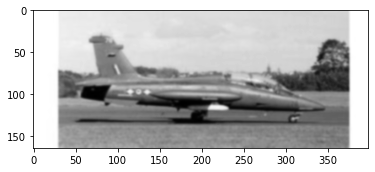

In [33]:
gaussian = gaussian_filter(gray, 1)
plt.imshow(gaussian)